In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("train.csv")

In [6]:
num_cols = [
    "SalePrice",
    "LotFrontage",
    "LotArea",#
    "OverallQual",#
    "OverallCond",#
    "YearBuilt",#
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "TotalBsmtSF",#
    "1stFlrSF",#
    "2ndFlrSF",#
    "LowQualFinSF",#
    "GrLivArea",#
    "BsmtHalfBath",
    "BsmtFullBath",
    "FullBath",#
    "HalfBath",#
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold"
]

df_nums = df[num_cols]

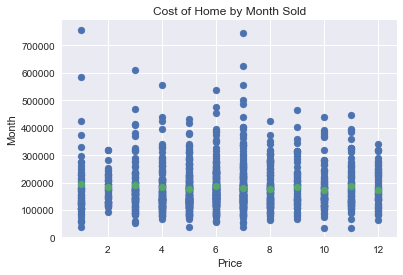

In [7]:
plt.scatter(df.MoSold, df.SalePrice)
plt.scatter(df.MoSold.unique(), df.groupby("MoSold").SalePrice.mean())
plt.xlabel("Price")
plt.ylabel("Month")
plt.title("Cost of Home by Month Sold")

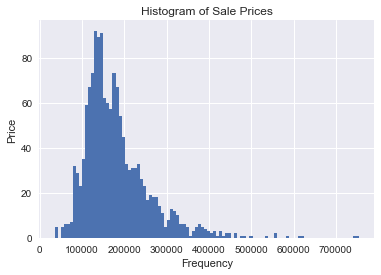

In [8]:
df.SalePrice.hist(bins=100)
df.SalePrice.describe()
plt.title("Histogram of Sale Prices")
plt.xlabel("Frequency")
plt.ylabel("Price")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bf2da50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ceb2090>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10df69910>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f04b5d0>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x12eb37350>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12fc55150>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130d52c10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x131cf44d0>]], dtype=object)

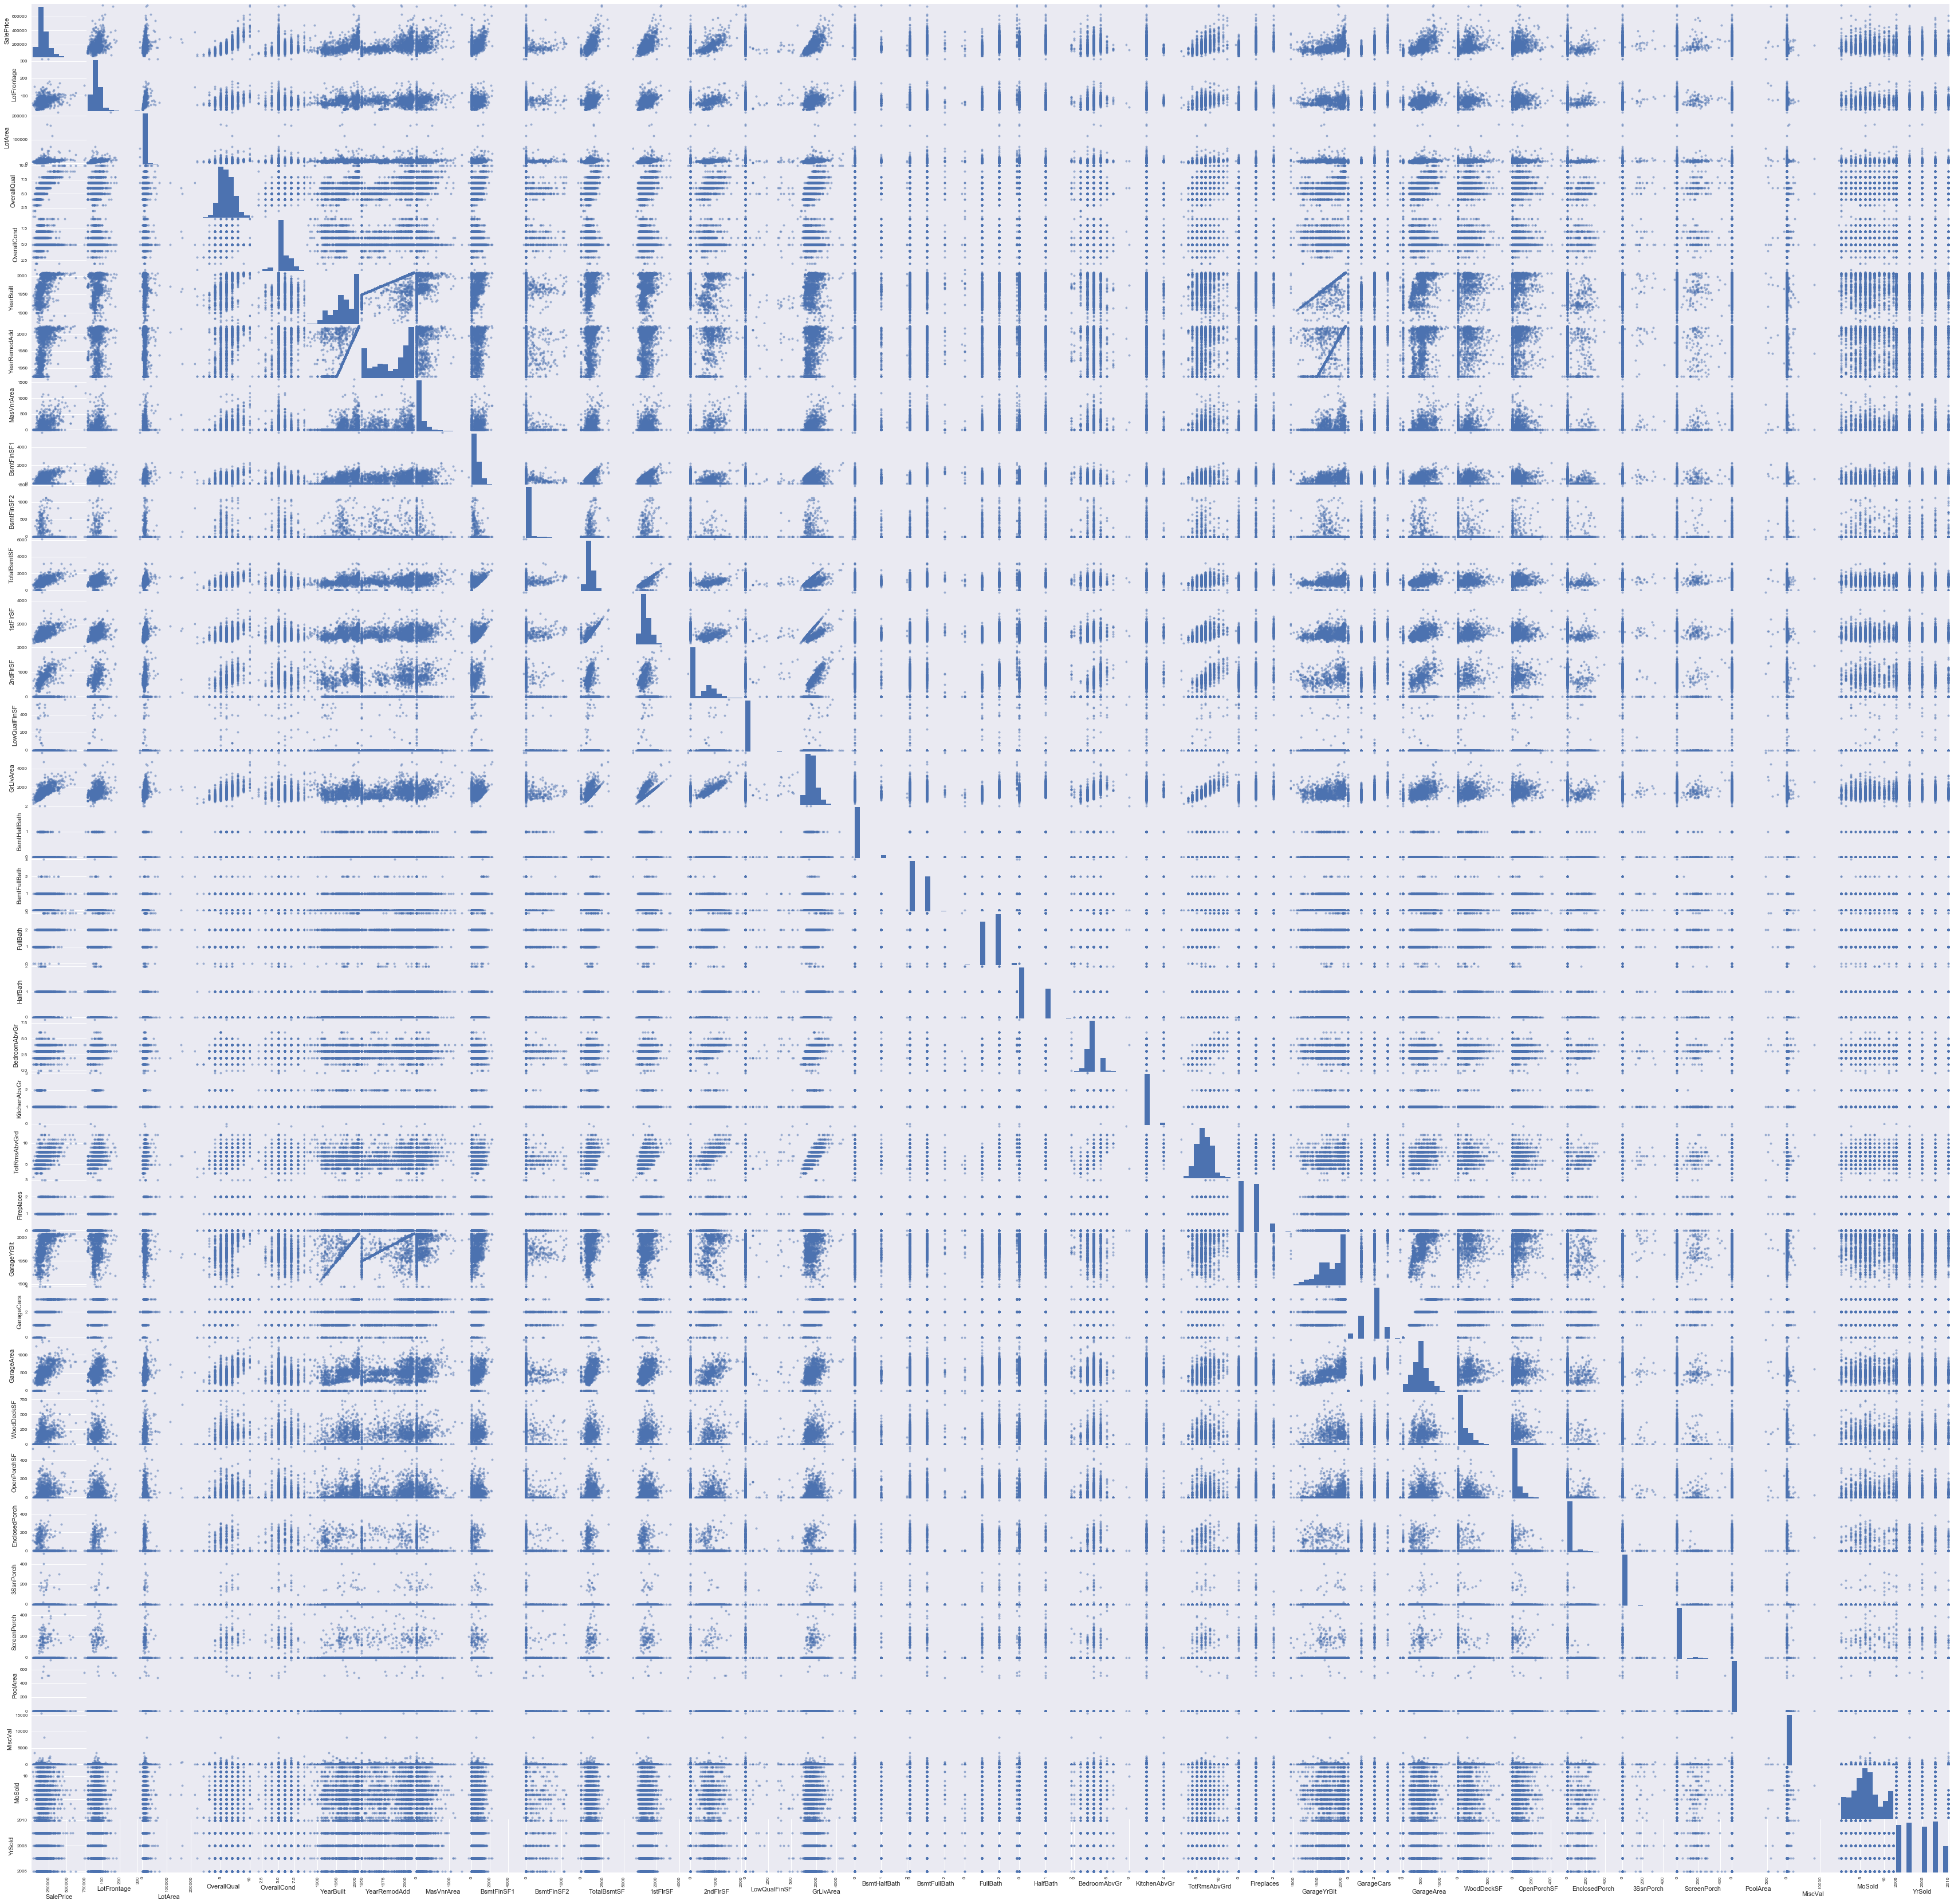

In [6]:
#pd.scatter_matrix(df_nums, figsize=(60,60))

# Describe categorical features

##### Make a function that does the follow
-  Takes the dataframe of the house price data plus a categorical feature to look at 
-  Gives you the count/mean/median/min/max of the SalePrice for each of the categories
-  Plots a histogram of the SalePrice for each category 

MSSubClass | 60
	Mean: 239948 
	Median: 215200
	Minimum: 129000 
	Maximum: 755000 
	Count: 299 



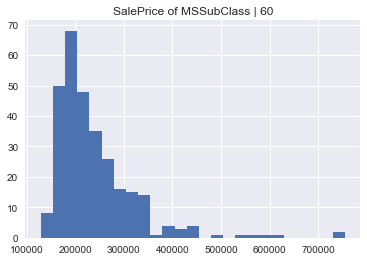

MSSubClass | 20
	Mean: 185224 
	Median: 159250
	Minimum: 35311 
	Maximum: 611657 
	Count: 536 



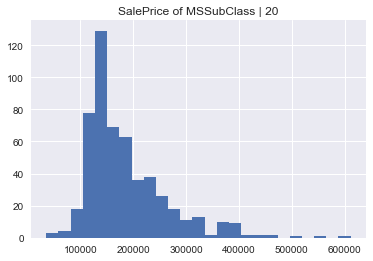

MSSubClass | 70
	Mean: 166772 
	Median: 156000
	Minimum: 40000 
	Maximum: 359100 
	Count: 60 



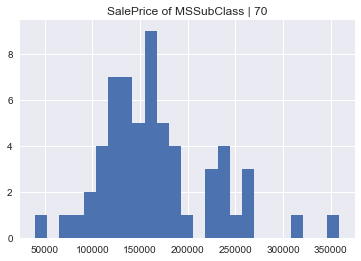

MSSubClass | 50
	Mean: 143302 
	Median: 132000
	Minimum: 37900 
	Maximum: 410000 
	Count: 144 



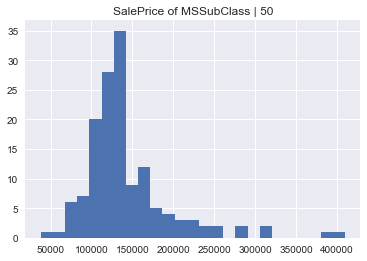

MSSubClass | 190
	Mean: 129613 
	Median: 128250
	Minimum: 55000 
	Maximum: 228950 
	Count: 30 



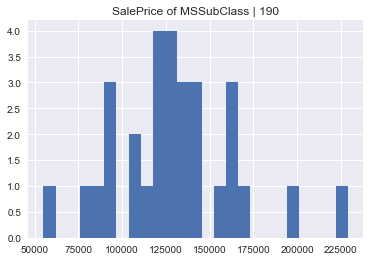

MSSubClass | 45
	Mean: 108591 
	Median: 107500
	Minimum: 76000 
	Maximum: 139400 
	Count: 12 



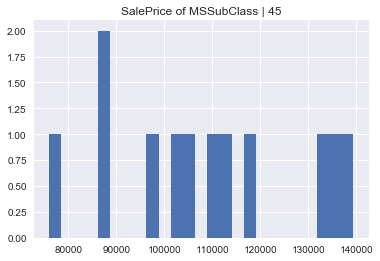

MSSubClass | 90
	Mean: 133541 
	Median: 135980
	Minimum: 82000 
	Maximum: 206300 
	Count: 52 



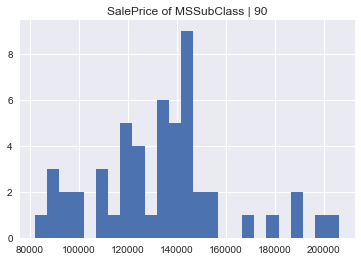

MSSubClass | 120
	Mean: 200779 
	Median: 192000
	Minimum: 99500 
	Maximum: 392500 
	Count: 87 



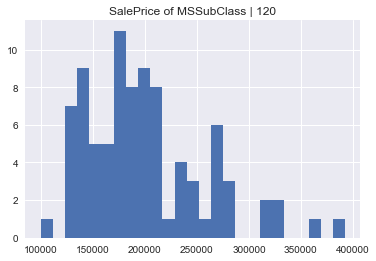

MSSubClass | 30
	Mean: 95829 
	Median: 99900
	Minimum: 34900 
	Maximum: 163500 
	Count: 69 



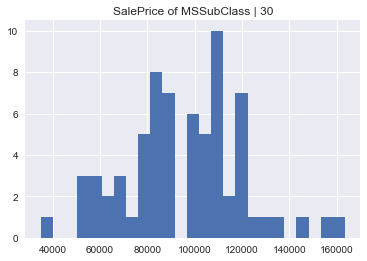

MSSubClass | 85
	Mean: 147810 
	Median: 140750
	Minimum: 123000 
	Maximum: 198500 
	Count: 20 



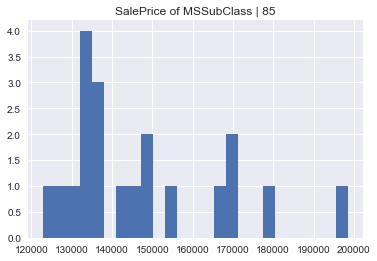

MSSubClass | 80
	Mean: 169736 
	Median: 166500
	Minimum: 107000 
	Maximum: 345000 
	Count: 58 



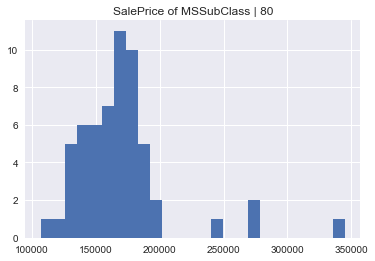

MSSubClass | 160
	Mean: 138647 
	Median: 146000
	Minimum: 75000 
	Maximum: 239000 
	Count: 63 



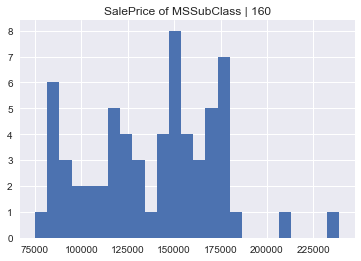

MSSubClass | 75
	Mean: 192437 
	Median: 163500
	Minimum: 101000 
	Maximum: 475000 
	Count: 16 



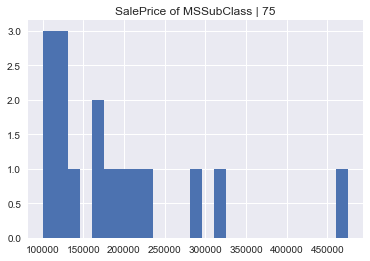

MSSubClass | 180
	Mean: 102300 
	Median: 88500
	Minimum: 75500 
	Maximum: 148000 
	Count: 10 



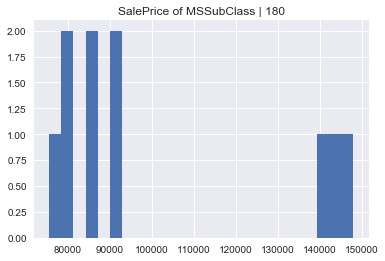

MSSubClass | 40
	Mean: 156125 
	Median: 142500
	Minimum: 79500 
	Maximum: 260000 
	Count: 4 



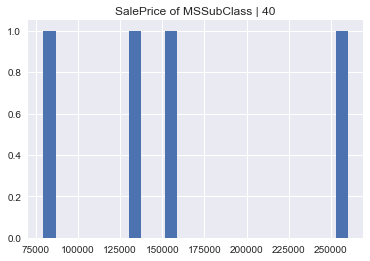

True

In [9]:
def describe_categorical_feature(data, category, bins):
    arr = data[category]
    
    gb = data.groupby(category).SalePrice
    mean = gb.mean()
    median = gb.median()
    mini = gb.min()
    maxi = gb.max()
    ct = gb.count()
    
    for cat in data[category].unique():
        print category,"|", cat
        print "\tMean:", mean[cat], "\n\tMedian:", median[cat]
        print "\tMinimum:",mini[cat],"\n\tMaximum:",maxi[cat],"\n\tCount:",ct[cat],"\n"
        plt.figure()
        plt.hist(data[arr.map(lambda x: x == cat)].SalePrice,bins=bins)
        titl = "SalePrice of %s | %s" % (category, cat)
        plt.title(titl)
        plt.show()
        
    return True

# Do this with all the categorical features and look at them...
describe_categorical_feature(df, "MSSubClass",25)



In [10]:
cat_cols = [i for i in df.columns if i not in num_cols]
df_cat = df[cat_cols]

df_cat = pd.get_dummies(df_cat)
df_all = pd.concat([df_nums, df_cat], axis=1)
df_all.head(5)

y = df_all.SalePrice
df_all.__delitem__("SalePrice")
X = df_all

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor()
print cross_val_score(dt, X.fillna(0),y, cv=5)

[ 0.74043357  0.75699755  0.83705038  0.7297514   0.63037931]


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
print cross_val_score(rf, X.fillna(0),y, cv=5)

[ 0.86484887  0.82250945  0.88467406  0.83454012  0.82110349]


# Split numerical attributes into groups
-  Necessary to look at possible repetative attributes
-  Easier to read pair plots

In [33]:
lot = [
    "SalePrice",
    "LotFrontage",
    "LotArea"
]

major = [
    "SalePrice",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "YrSold"
    "MiscVal",
    "MoSold",
]

basement = [
    "SalePrice",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "TotalBsmtSF"
]

floors = [
    "SalePrice",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea"
]

rooms = [
    "SalePrice",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
]

bathrooms = [
    "SalePrice",
    "BsmtHalfBath",
    "BsmtFullBath",
    "FullBath",
    "HalfBath",
]

garage = [
    "SalePrice",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
]
    
outdoors = [
    "SalePrice",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MasVnrArea"
]

year = [
    "SalePrice",
    "GarageYrBlt",
    "YearBuilt",
    "YearRemodAdd",
]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d198d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d33a450>]], dtype=object)

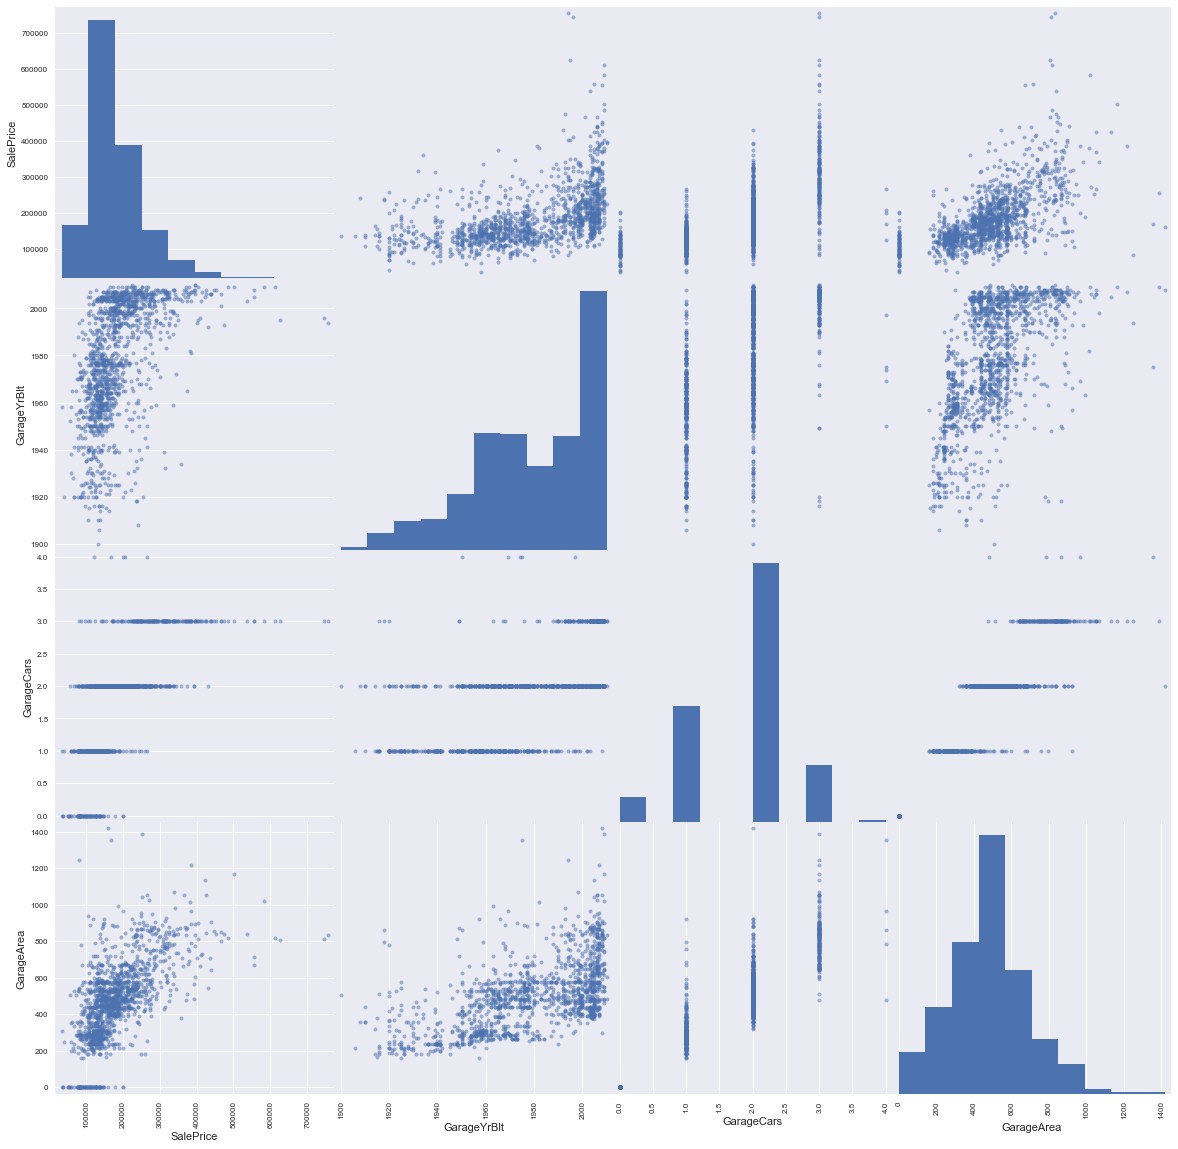

In [34]:
pd.scatter_matrix(df[garage], figsize=(20,20))

In [38]:
df[garage].corr()

,SalePrice,GarageYrBlt,GarageCars,GarageArea
SalePrice,1.000000,0.486362,0.640409,0.623431
GarageYrBlt,0.486362,1.000000,0.588920,0.564567
GarageCars,0.640409,0.588920,1.000000,0.882475
GarageArea,0.623431,0.564567,0.882475,1.000000


In [39]:
df[garage].head(20)

,SalePrice,GarageYrBlt,GarageCars,GarageArea
0,208500,2003.0,2,548
1,181500,1976.0,2,460
2,223500,2001.0,2,608
3,140000,1998.0,3,642
4,250000,2000.0,3,836
5,143000,1993.0,2,480
6,307000,2004.0,2,636
7,200000,1973.0,2,484
8,129900,1931.0,2,468
9,118000,1939.0,1,205


In [48]:
print "Range of GarageArea given GarageCars == [1,2,3,4]\n"

print df[df.GarageCars == 1].GarageArea.describe()
print df[df.GarageCars == 2].GarageArea.describe()
print df[df.GarageCars == 3].GarageArea.describe()
print df[df.GarageCars == 4].GarageArea.describe()

Range of GarageArea given GarageCars == [1,2,3,4]

count    369.000000
mean     300.517615
std       87.804287
min      160.000000
25%      250.000000
50%      288.000000
75%      325.000000
max      924.000000
Name: GarageArea, dtype: float64
count     824.000000
mean      519.797330
std        98.814314
min       320.000000
25%       450.000000
50%       506.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
count     181.000000
mean      811.574586
std       126.800855
min       478.000000
25%       732.000000
50%       818.000000
75%       870.000000
max      1390.000000
Name: GarageArea, dtype: float64
count       5.000000
mean      890.400000
std       317.510315
min       480.000000
25%       784.000000
50%       864.000000
75%       968.000000
max      1356.000000
Name: GarageArea, dtype: float64


'\nprint df[df.GarageCars == 1].GarageArea.max()\n\nprint df[df.GarageCars == 2].GarageArea.min()\nprint df[df.GarageCars == 2].GarageArea.max()\n\nprint df[df.GarageCars == 3].GarageArea.min()\nprint df[df.GarageCars == 3].GarageArea.max()\n\nprint df[df.GarageCars == 4].GarageArea.min()\nprint df[df.GarageCars == 4].GarageArea.max()\n'

### Garage
-  GarageCars information seems to be a function of GarageArea, though the area of 3 and 4 car garages have similar distributions. There are very few (5 out of 1460) 4-car-garage homes. It may be reasonable to put 3 and 4 car garages together as one category. GarageCars and GarageArea have a correlation of 0.88. GarageCars has a high correlation with SalePrice. One of these should be removed.


    REMOVE GarageArea

In [54]:
df[garage].corr()

,SalePrice,GarageYrBlt,GarageCars,GarageArea
SalePrice,1.000000,0.486362,0.640409,0.623431
GarageYrBlt,0.486362,1.000000,0.588920,0.564567
GarageCars,0.640409,0.588920,1.000000,0.882475
GarageArea,0.623431,0.564567,0.882475,1.000000


In [52]:
df_test = df.copy()
df_test.GarageCars = df_test.GarageCars.map(lambda x: 3 if (x==4) else x)
df_test[garage].corr()

,SalePrice,GarageYrBlt,GarageCars,GarageArea
SalePrice,1.000000,0.486362,0.646652,0.623431
GarageYrBlt,0.486362,1.000000,0.599204,0.564567
GarageCars,0.646652,0.599204,1.000000,0.882971
GarageArea,0.623431,0.564567,0.882971,1.000000


### Garage
-  Making 4 car garages the same category as 3 car garages increases GarageCars correlation with SalePrice by 0.0066. This is not high because there are only 5 homes with 4 car garages, but is an improvement. 


    COMBINE GarageCars == 3 AND GarageCars == 4 AS ONE CATEGORY

,SalePrice,GarageYrBlt,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.486362,0.522897,0.507101
GarageYrBlt,0.486362,1.000000,0.825667,0.642277
YearBuilt,0.522897,0.825667,1.000000,0.592855
YearRemodAdd,0.507101,0.642277,0.592855,1.000000


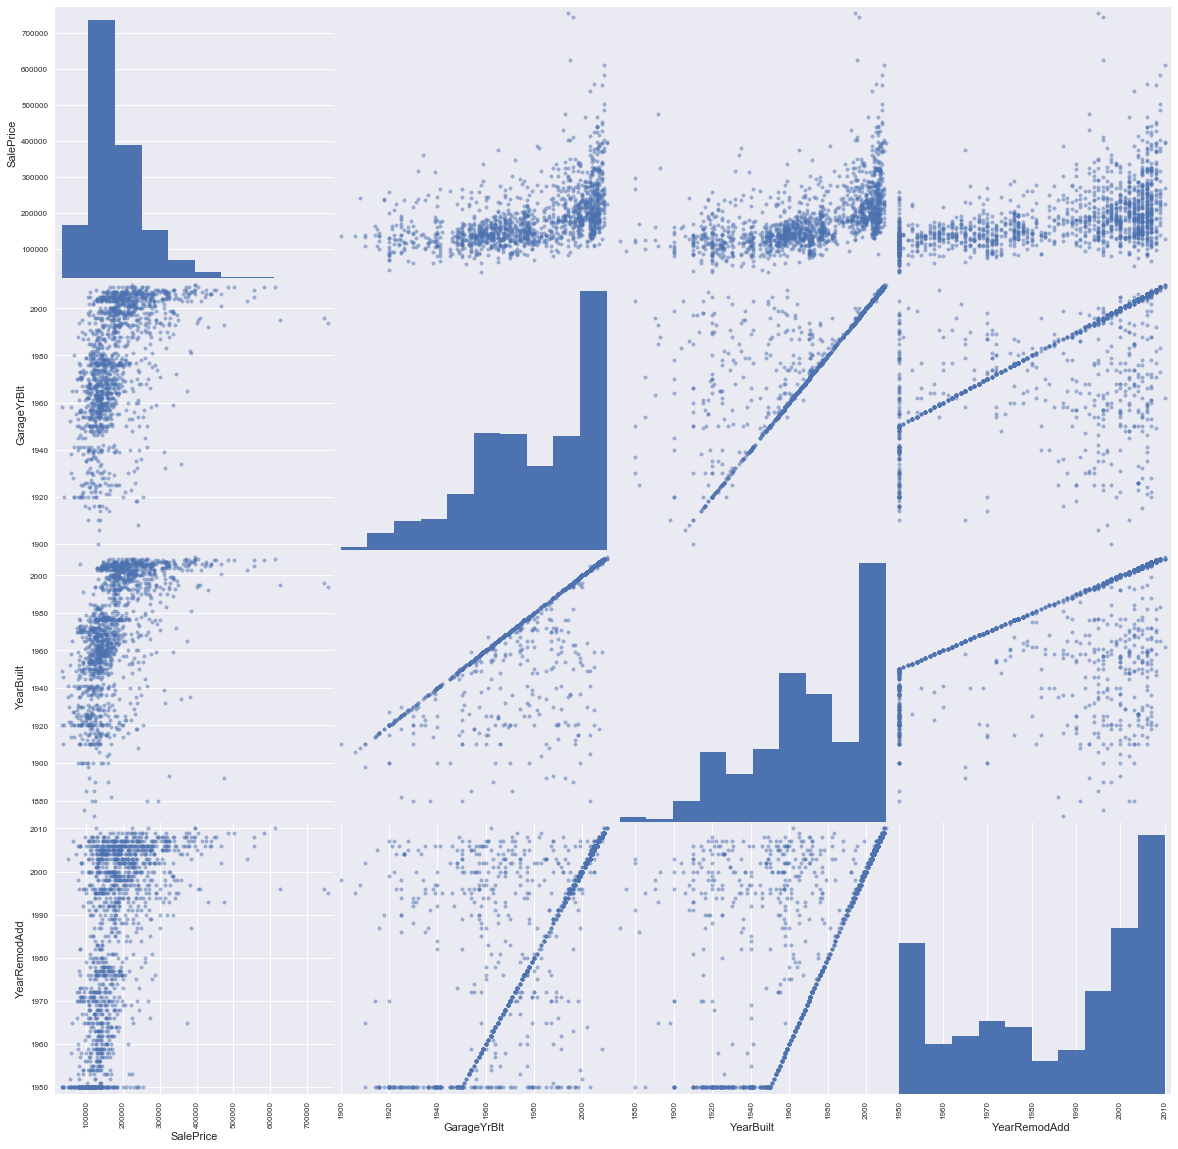

In [37]:
pd.scatter_matrix(df[year], figsize=(20,20))
df[year].corr()

### Year 
-  YearBuilt is clearly a lower bound on YearRemodAdd and GarageYrBlt
-  GarageYrBlt and YearBuilt have a high correlation of 0.82. YearBuilt has a higher correlation to SalePrice than GarageYrBlt. GarageYrBlt may be removed.


    CONSIDER REMOVING GarageYrBlt

In [69]:
print "There are", pd.isnull(df.GarageYrBlt).sum(), "Nans in GarageYrBlt."

There are 81 Nans in GarageYrBlt.


In [62]:
df_test.GarageYrBlt = df_test.GarageYrBlt.fillna(df_test.GarageYrBlt.median())

df_test[year].corr()

In [82]:
from sklearn.decomposition import PCA
year_noprice = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']
year_single = pd.DataFrame(PCA(n_components=1).fit_transform(df_test[year_noprice]))

In [83]:
year_single["price"] = df.SalePrice
year_single.corr()

,0,price
0,1.000000,-0.558781
price,-0.558781,1.000000


### Year
-  performing PCA on the 3 year variabes after filling GarageYrBlt's Nans with the median year produced a varible with a higher correlation to SalePrice (0.558) than the other 3 variables. Explore using this varibale...


    CONSIDER USING PCA

,SalePrice,BsmtHalfBath,BsmtFullBath,FullBath,HalfBath
SalePrice,1.000000,-0.016844,0.227122,0.560664,0.284108
BsmtHalfBath,-0.016844,1.000000,-0.147871,-0.054536,-0.012340
BsmtFullBath,0.227122,-0.147871,1.000000,-0.064512,-0.030905
FullBath,0.560664,-0.054536,-0.064512,1.000000,0.136381
HalfBath,0.284108,-0.012340,-0.030905,0.136381,1.000000


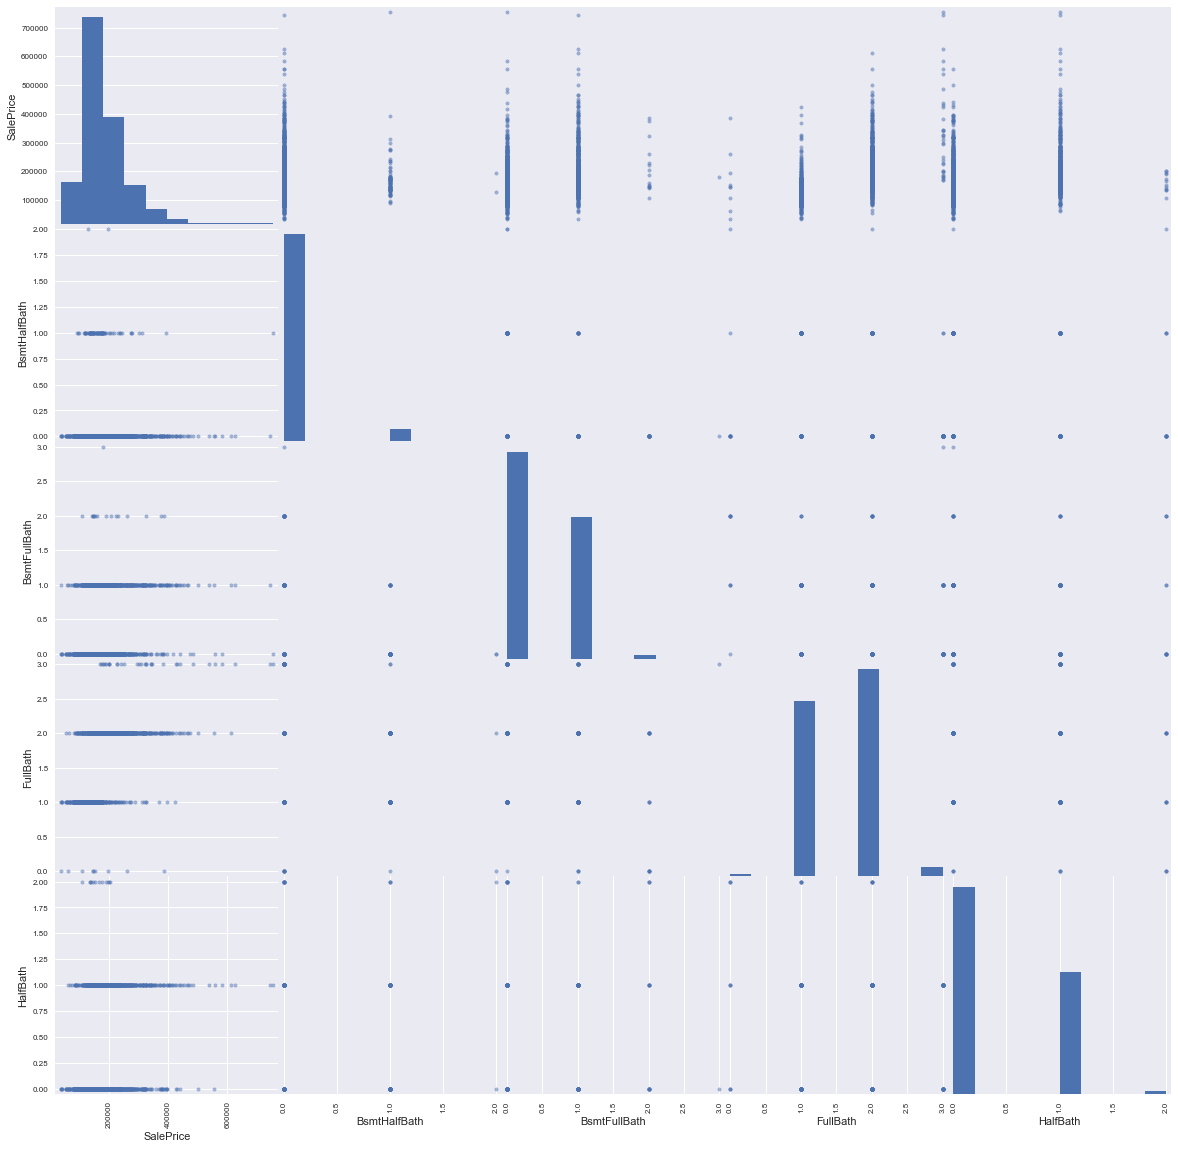

In [84]:
pd.scatter_matrix(df[bathrooms], figsize=(20,20))
df[bathrooms].corr()

In [95]:
test = pd.DataFrame(df_test.BsmtFullBath.astype(float) + df_test.BsmtHalfBath.astype(float)/2)
print test.describe()
test["sales"] = df.SalePrice
test.corr()

                 0
count  1460.000000
mean      0.454110
std       0.514975
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000


,0,sales
0,1.000000,0.224953
sales,0.224953,1.000000


### Bathrooms
-  The number of halfbaths in the basement seems to have no relationship to the SalePrice. Adding this number to the number of full bathrooms in the basement does not improve correlation to SalePrice. This may be removed. 
-  The number of full baths has the highest coorelation to SalePrice, 0.55. 
-  None of the bathroom variables have a significantly high correlation with each other to the point that we should consider removing redundant features. 


    REMOVE BsmtHalfBath 
    CONSIDER REMOVING BsmtFullBath

,SalePrice,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
SalePrice,1.000000,0.168213,-0.135907,0.533723,0.466929
BedroomAbvGr,0.168213,1.000000,0.198597,0.676620,0.107570
KitchenAbvGr,-0.135907,0.198597,1.000000,0.256045,-0.123936
TotRmsAbvGrd,0.533723,0.676620,0.256045,1.000000,0.326114
Fireplaces,0.466929,0.107570,-0.123936,0.326114,1.000000


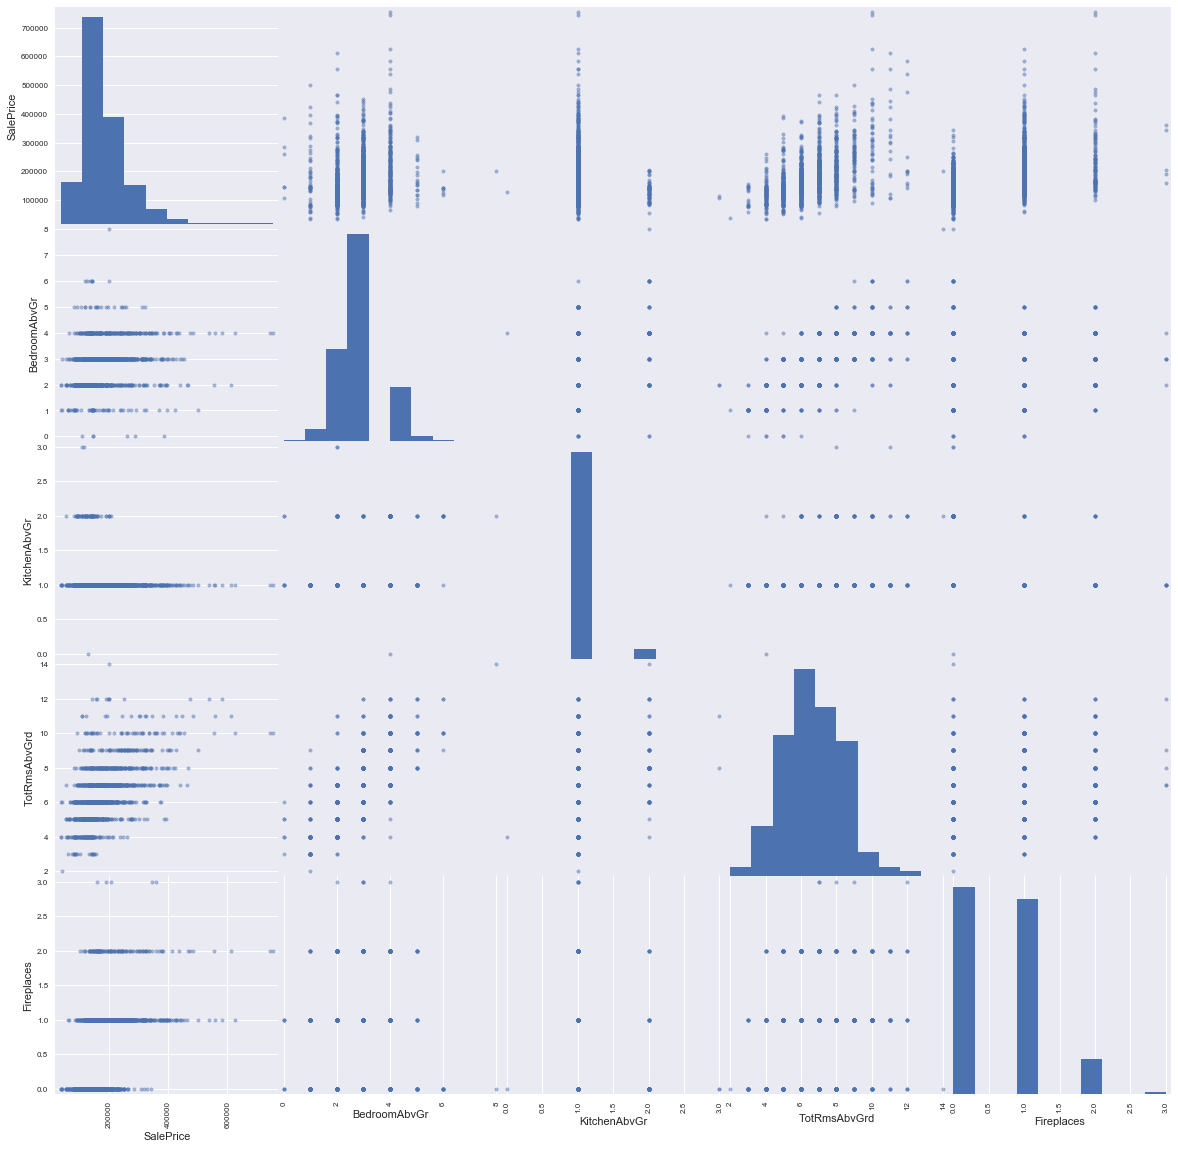

In [96]:
pd.scatter_matrix(df[rooms], figsize=(20,20))
df[rooms].corr()

KitchenAbvGr | 1
	Mean: 183388 
	Median: 165550
	Minimum: 34900 
	Maximum: 755000 
	Count: 1392 



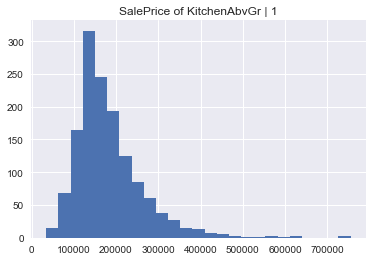

KitchenAbvGr | 2
	Mean: 131096 
	Median: 133900
	Minimum: 55000 
	Maximum: 206300 
	Count: 65 



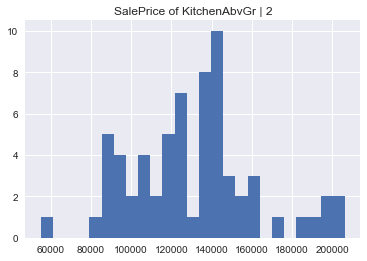

KitchenAbvGr | 3
	Mean: 109500 
	Median: 109500
	Minimum: 106000 
	Maximum: 113000 
	Count: 2 



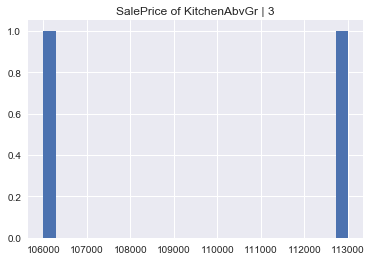

KitchenAbvGr | 0
	Mean: 127500 
	Median: 127500
	Minimum: 127500 
	Maximum: 127500 
	Count: 1 



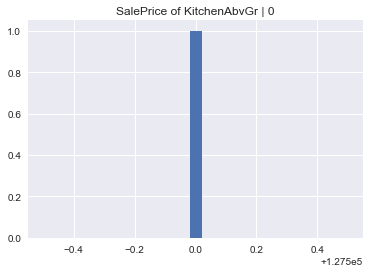

True

In [99]:
describe_categorical_feature(df, "KitchenAbvGr",25)

### Rooms
-  oddly, the number of kitchens seems to be negatively correlated with price. Also, there is a simple home with zero kitchens. This should be grouped with homes with 1 kitchen. 
-  Bedrooms and total rooms are highly correlated (0.68) but not enough to warrent combination. 

    COMBINE KitchenAbvGr == 0 AND KitchenAbvGr == 1